In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

# Generating Data:

In [2]:
# Generating data:
mean_1 = np.array([10,10])
cov_1 = np.array([[9, 0],
                  [0, 7]])
data_1 = np.random.multivariate_normal(mean_1, cov_1, size=150)

mean_2 = np.array([1,1])
cov_2 = np.array([[8, 0],
                  [0, 6]])
data_2 = np.random.multivariate_normal(mean_2, cov_2, size=150)

data = np.concatenate([data_1, data_2])
np.random.shuffle(data)

# Visualizing Data:

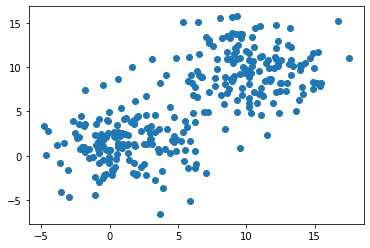

In [3]:
# visualizing Data:
x_1 = [i[0] for i in data]
x_2 = [i[1] for i in data]
plt.scatter(x_1, x_2);

# K-means :

In [4]:
def kmeans(data, k):
    global x_1
    global x_2
    # initial centroids:
    min_points = min([min(x_1), min(x_2)])
    max_points = max([max(x_1), max(x_2)])
    
    centroids = []
    for i in range(k):
        centroids.append(np.array([np.random.randint(min_points,max_points), np.random.randint(min_points,max_points)]))
        
    
    iter_flag = 1
    while(iter_flag):
        cent_before = centroids.copy()


        clusters = []
        # Cluster assignments:
        for i in range(data.shape[0]):
            distances = []
            for j in range(len(centroids)):
                distances.append(norm(centroids[j] - data[i]))

            clusters.append(np.argmin(distances))
        
        # Points in each cluster
        cluster_points = []
        for m in range(k):
            cluster_points.append([data[i] for i in range(len(clusters)) if clusters[i]==m])
        
        # Visualization:
        c_0 = [i[0] for i in centroids]
        c_1 = [i[1] for i in centroids]
        plt.scatter(x_1, x_2, c=clusters)
        plt.scatter(c_0, c_1, marker='x', color='red')
        plt.show()

        # adjusting centroids:
        for n in range(len(centroids)):
            x1 = [i[0] for i in cluster_points[n]]
            x2 = [i[1] for i in cluster_points[n]]
            centroids[n] = np.array([np.mean(x1), np.mean(x2)])

        cent_after = centroids.copy()
        
        # condition to stop
        checks = []
        for i in range(k):
            if norm(cent_before[i])-norm(cent_after[i]) > 0.1:
                checks.append(1)
            else:
                checks.append(0)
        
        if sum(checks) >= 1:
            continue
        else:
            iter_flag = False
          
    avg_error = calc_error(centroids, len(data), cluster_points)
    
    return centroids, avg_error

In [5]:
def calc_error(centroids, data_size, cluster_points):

    error = 0
    for i in range(len(centroids)):
        for point in cluster_points[i]:
            error += norm((centroids[i] - point), 2)
    error /= data_size
    return error

# Applying Kmeans on data with different k values:

## K = 2

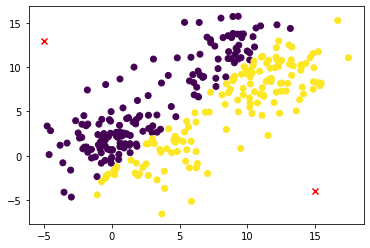

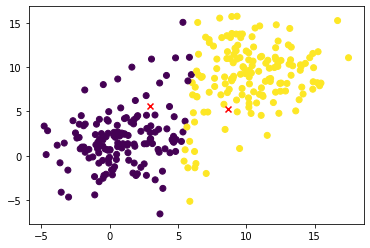

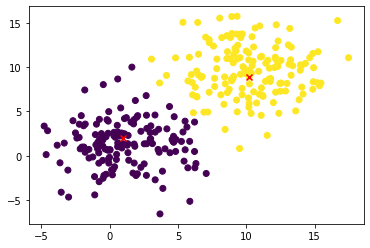

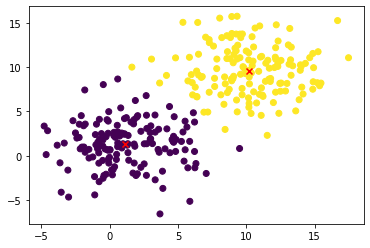

In [6]:
centroids, error = kmeans(data, k=2)

In [7]:
print('Average Error with k = 2 -->', error)

Average Error with k = 2 --> 3.422205584004692


## K = 3

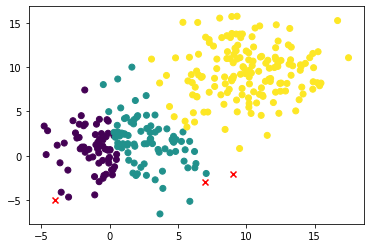

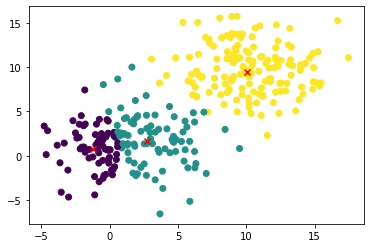

In [8]:
centroids, error = kmeans(data, k=3)

In [9]:
print('Average Error with k = 3 -->', error)

Average Error with k = 3 --> 3.0723609385740107


## K = 4

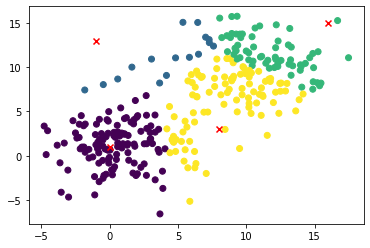

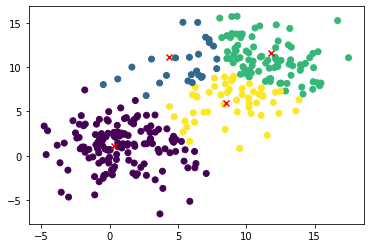

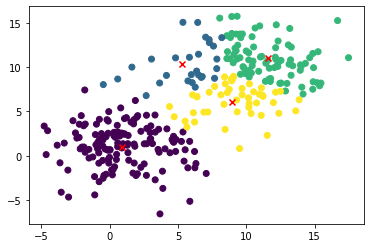

In [10]:
centroids, error = kmeans(data, k=4)

In [11]:
print('Average Error with k = 4 -->', error)

Average Error with k = 4 --> 2.876581328612282
